# Tutorium DSCB 230

Tim Ehmann


#### Aufgabe 3: Python 3.10 Features

Für `for` Schleifen ist die `zip` Methode in vielen Fällen sehr hilfreich, um mehrere Listen überschaulich zu kombinieren. Dabei kann es jedoch zu nervigen und schwer zu findenden Bugs kommen, wenn die Listen unterschiedlich lang sind, besonders bei größeren Datensätzen.

In [19]:
l1 = ["Martin", "Paul", "Sahra", "Justin", "Emmy"]
l2 = ["Stuttgart", "Karlsruhe", "Berlin", "Frankfurt", "München"]
l3 = [70173, 76187, 10115, 60306]

for name, ort, plz in zip(l1, l2, l3):
    print (f"{name} aus {plz}-{ort} ")

Martin aus 70173-Stuttgart 
Paul aus 76187-Karlsruhe 
Sahra aus 10115-Berlin 
Justin aus 60306-Frankfurt 


Wenn Sie den Code ausführen, merken Sie, dass die Informationen zu Emmy aus München verloren gegangen ist, da die Postleitzahl von ihr in der Liste fehlt. Diesen Bug abzufangen würde in 3.9 oder älteren Versionen einen Vergleich der Listenlängen benötigen. In 3.10 kam der Parameter `strict` zur Zip-Methode hinzu. Hierbei können nur noch gleichlange Iterables gezippt werden, wenn strict auf True gesetzt ist.

In [18]:
for name, ort, plz in zip(l1, l2, l3, strict = True):
    print (f"{name} aus {plz}-{ort} ")

Martin aus 70173-Stuttgart 
Paul aus 76187-Karlsruhe 
Sahra aus 10115-Berlin 
Justin aus 60306-Frankfurt 


ValueError: zip() argument 3 is shorter than arguments 1-2

Wenn Sie versuchen, diesen Code nun auszuführen, wird ein Fehler geworfen.

Aus den Statistik Vorlesungen von letztem Jahr sollte Ihnen der Pearsonsche Korrelationskoeffizient noch ein Begriff sein. Diesen zu berechnen ist jetzt seit Python 3.10 direkt implementiert und kann über das `statistics` modul mithilfe von `statistics.correlation()` verwendet werden. Diese Zahl beschreibt aber nur den Grad einer linearen Korrelation. Zudem kann mit `statistics.covariance()` die Kovarianz zweier Merkmale und mit `statistics.linear_regression()` die Parameter einer Regressiongeraden berechnet werden.

Berechnen Sie zuerst den Pearsonschen Korrelationsgroße zwischen Alter und Größe bei Jungs und Mäödchen zwischen dem Alter 1 und 14. Stellen Sie danach die Größe von Mädchen und Jungs abhängig vom Alter mithilfe von matplotlib dar sowie die durch das statistics Modul berechnete Lineare Regressionsgerade.

Korrelationskoeffizient Mädchen: 0.9959443615081378
Korrelationskoeffizient Mädchen: 0.9966667127911837


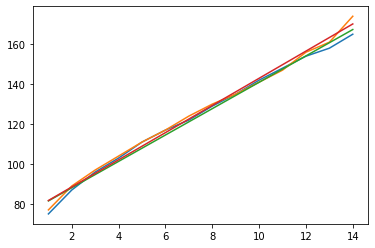

In [17]:
import statistics
import matplotlib.pyplot as plt

größe_Mädchen = [75, 87, 96, 103, 111, 117, 122, 129, 135, 142, 148, 154, 158, 165]
alter_Mädchen = [i for i in range(1,15)]

größe_Jungs = [77, 89, 97, 104, 111, 117, 124, 130, 135, 141, 147, 156, 161, 174]
alter_Jungs = [i for i in range(1,15)]

print(f'Korrelationskoeffizient Mädchen: {statistics.correlation(alter_Mädchen, größe_Mädchen)}')
print(f'Korrelationskoeffizient Mädchen: {statistics.correlation(alter_Jungs, größe_Jungs)}')
a_Mädchen, b_Mädchen = statistics.linear_regression(alter_Mädchen, größe_Mädchen)[0], statistics.linear_regression(alter_Mädchen, größe_Mädchen)[1]
a_jungs, b_jungs = statistics.linear_regression(alter_Jungs, größe_Jungs)[0], statistics.linear_regression(alter_Jungs, größe_Jungs)[1]

plt.plot(alter_Mädchen, größe_Mädchen, label = "Mädchen")
plt.plot(alter_Jungs, größe_Jungs, label = 'Jungs')
plt.plot([1, 14],[b_Mädchen+a_Mädchen, b_Mädchen+a_Mädchen*14])
plt.plot([1, 14],[b_jungs+a_jungs, b_jungs+a_jungs*14])
plt.show()